In [1]:
import uproot as up
import awkward1 as ak
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import boost_histogram as bh
import numpy as np

In [2]:
use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

In [8]:
Branch_List = ['pt2l','mass2l','EventWeight','foundZ1LCandidate','foundTTCRCandidate','foundZ2JCandidate','foundZ2MergedCandidata','foundTTCRCandidate','passedfullmerged','passedfullresolved','particleNetZvsQCD','passedNassociated','isEE','isMuMu',
                        'massmerged','ptmerged',
                        'pt2jet','mass2jet',
                        'mass2l2jet', 'mass2lj',
                        'KD_jjVBF','KD_JVBF','KD_ZJ','KD_Zjj',
                        'isbjet','iscjet','islightjet',
                        'jet_1_btag','jet_2_btag','particleNetZbbvslight',
                        'lep_1_pt','lep_2_pt']
arr = {'Jialin': up.lazy('/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/fileout/sync_DY_pt50to100.root:passedEvents', filter_name=Branch_List),
    'Ankita':up.lazy('/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/fileout/DYJetsToLL_Pt-50To100_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8.root:passedEvents', filter_name=Branch_List)}

In [11]:
selection = 'foundZ1LCandidate==True'
arr_cut={}
for key in arr.keys():
    cut_array = ak.numexpr.evaluate(selection,arr[key])
    arr_cut[key] = arr[key][cut_array]

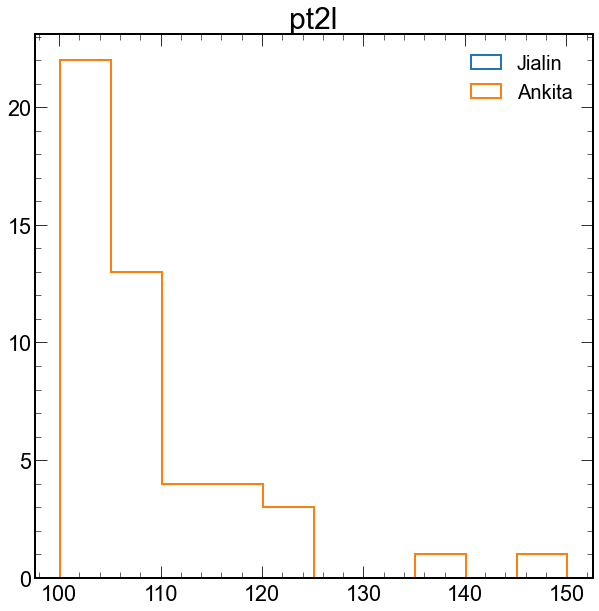

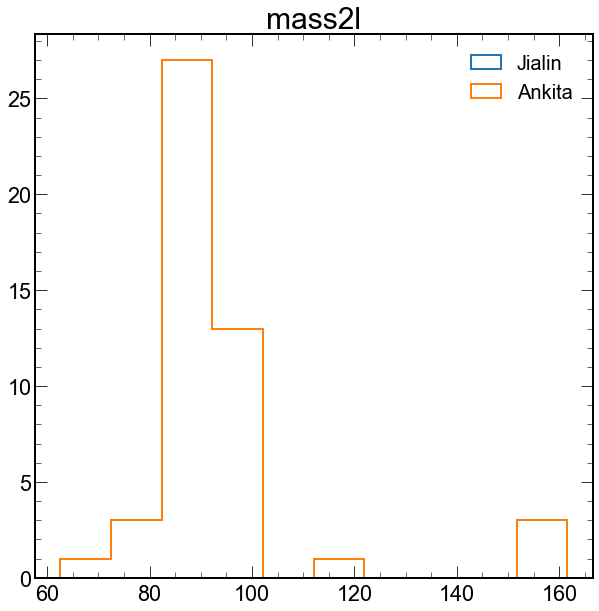

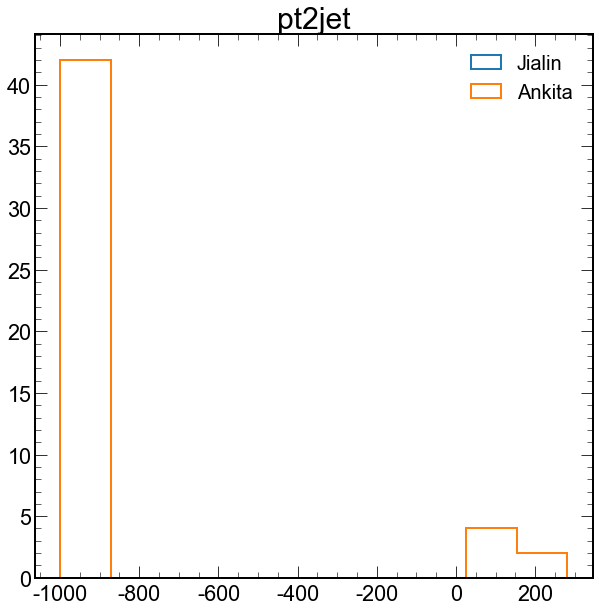

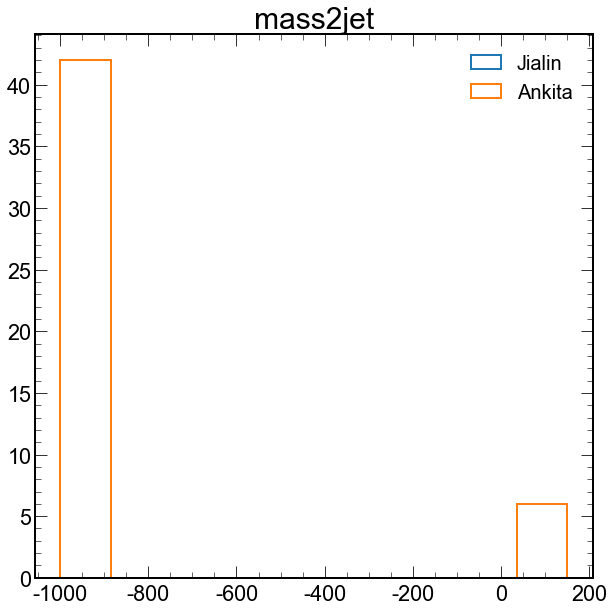

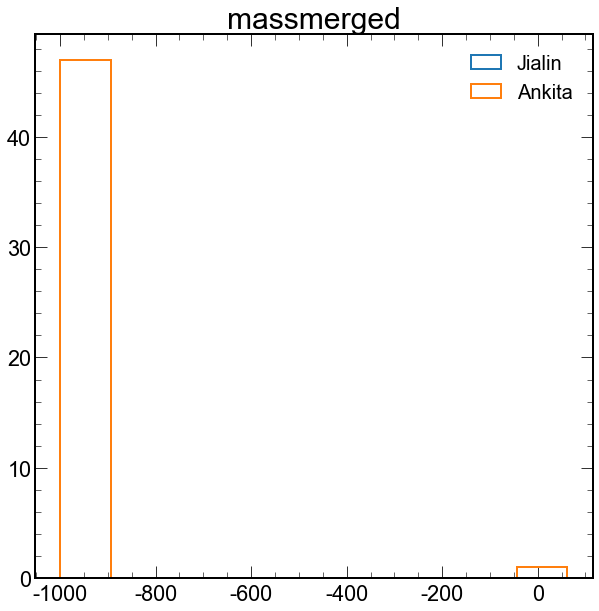

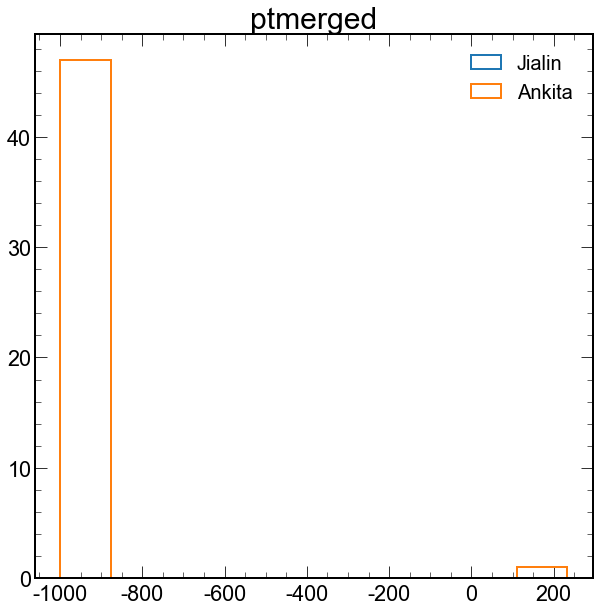

In [14]:
for branch in ['pt2l','mass2l','pt2jet','mass2jet','massmerged','ptmerged',]:
    f = plt.figure(figsize=(10,10))
    #plt.hist(ak.flatten(arr['Jialin'][branch]),fill = False,linewidth = 2,histtype='step',label = 'Jialin')
    #plt.hist(ak.flatten(arr['Ankita'][branch]),fill = False,linewidth = 2,histtype='step',label = 'Ankita')
    plt.hist(arr['Jialin'][branch],fill = False,linewidth = 2,histtype='step',label = 'Jialin')
    plt.hist(arr['Ankita'][branch],fill = False,linewidth = 2,histtype='step',label = 'Ankita')
    plt.title(branch,fontsize=30)
    plt.legend(loc=1,fontsize=20)

    plt.savefig(f'./{branch}.png')